# VA Check

For households with at most three adults (drivers).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

## define

In [2]:
va_order = ['zv', 'iv', 'sv']
mpos = ['BRMPO', 'BRPC', 'CCC', 'CMRPC', 'FRCOG', 'MRPC', 'MVC',
       'MVPC', 'NMCOG', 'NPEDC', 'OCPC', 'PVPC', 'SRPEDD']

In [3]:
def va_comp(csv_1, csv_2, csv_3, csv_4, mpo=None):
    df1 = pd.read_csv(csv_1)
    df1 = df1.rename(columns={'num_households':'tdm19'})
    df2 = pd.read_csv(csv_2)
    df2 = df2.rename(columns={'va_ac3':'va','num_households':'rep19'})
    df3 = pd.read_csv(csv_3)
    df3 = df3.rename(columns={'va_ac3':'va','num_households':'rep22'})
    df4 = pd.read_csv(csv_4)
    df4 = df4.rename(columns={'va_ac3':'va','num_households':'rep23'})

    if mpo == None:
        df = df1.copy()
    else:
        df = df1[df1['mpo']==mpo].copy()

    df = df.merge(df2, on = ['mpo','va'])
    df = df.merge(df3, on = ['mpo','va'])
    df = df.merge(df4, on = ['mpo','va'])
    df['va'] = pd.Categorical(df['va'], categories=va_order, ordered=True)

    # Grouping by 'va' and calculating the sum for 'tdm19' and 'rep23'
    grouped_sum = df.groupby('va').sum().reset_index()

    # Calculating percentages
    total_1 = grouped_sum['tdm19'].sum()
    total_2 = grouped_sum['rep19'].sum()
    total_3 = grouped_sum['rep22'].sum()
    total_4 = grouped_sum['rep23'].sum()

    grouped_sum['tdm19_perc'] = grouped_sum['tdm19'] / total_1 * 100
    grouped_sum['rep19_perc'] = grouped_sum['rep19'] / total_2 * 100
    grouped_sum['rep22_perc'] = grouped_sum['rep22'] / total_3 * 100
    grouped_sum['rep23_perc'] = grouped_sum['rep23'] / total_4 * 100

    print(grouped_sum)

    # Plotting
    fig, ax = plt.subplots(figsize=(16, 8))
    bar_width = 0.2
    index = range(len(grouped_sum))

    bar1 = ax.bar([p - 1.5*bar_width for p in index], grouped_sum['tdm19_perc'], bar_width, label='TDM23 2019')
    bar2 = ax.bar([p - 0.5*bar_width for p in index], grouped_sum['rep19_perc'], bar_width, label='Replica 2019')
    bar3 = ax.bar([p + 0.5*bar_width for p in index], grouped_sum['rep22_perc'], bar_width, label='Replica 2022')
    bar4 = ax.bar([p + 1.5*bar_width for p in index], grouped_sum['rep23_perc'], bar_width, label='Replica 2023')

    ax.set_xlabel('Vehicle Availability')
    ax.set_ylabel('Percentage')
    if mpo == None:
        title = 'Percentage of Households by Vehicle Availability and Year (All RPAs)'
    else:
        title = 'Percentage of Households by Vehicle Availability and Year ('+mpo+')'
    ax.set_title(title)
    ax.set_xticks([p + bar_width / 2 for p in index])
    ax.set_xticklabels(grouped_sum['va'])
    ax.legend()

    plt.show()


## inputs

In [4]:
csv_1 = r'.\data\va_dc3_tdm2019_v0816.csv'
csv_2 = r'.\data\va_ac3_mpo_rep19_v0816.csv'
csv_3 = r'.\data\va_ac3_mpo_rep22_v0816.csv'
csv_4 = r'.\data\va_ac3_mpo_rep23_v0816.csv'


## draw

   va    tdm19    rep19    rep22    rep23  tdm19_perc  rep19_perc  rep22_perc  \
0  zv   174726   313625   315883   315935    6.892708   12.801350   12.489646   
1  iv   386198   453371   465991   469088   15.234996   18.505415   18.424741   
2  sv  1974016  1682941  1747285  1764006   77.872297   68.693236   69.085613   

   rep23_perc  
0   12.394327  
1   18.402615  
2   69.203057  


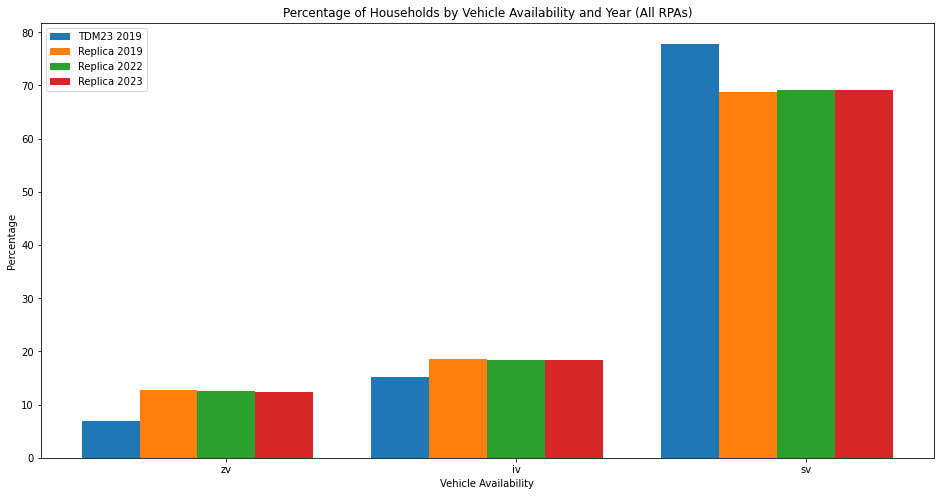

In [5]:
va_comp(csv_1, csv_2, csv_3, csv_4)

In [6]:
@interact
def va_comp_each_rpa(mpo = mpos):
    va_comp(csv_1, csv_2, csv_3, csv_4, mpo)

interactive(children=(Dropdown(description='mpo', options=('BRMPO', 'BRPC', 'CCC', 'CMRPC', 'FRCOG', 'MRPC', '…

BRMPO
   va   tdm19   rep19   rep22   rep23  tdm19_perc  rep19_perc  rep22_perc  \
0  zv  103250  193885  195564  197901    8.505188   16.429359   16.137175   
1  iv  220152  248063  256762  263133   18.134954   21.020275   21.186994   
2  sv  890563  738165  759559  762909   73.359858   62.550366   62.675831   

   rep23_perc  
0   16.169135  
1   21.498795  
2   62.332069  


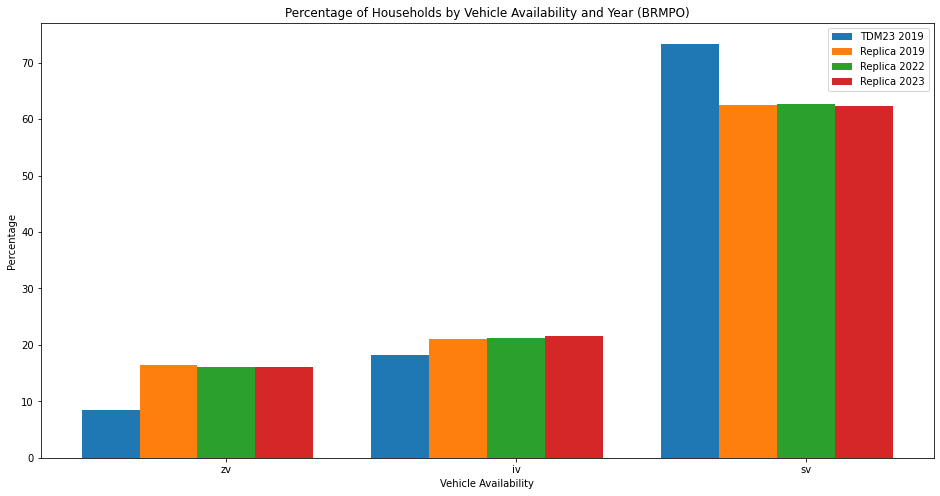

BRPC
   va  tdm19  rep19  rep22  rep23  tdm19_perc  rep19_perc  rep22_perc  \
0  zv   2315   4928   4952   5051    4.199775    9.415361    9.313523   
1  iv   5447   8032   7919   8484    9.881717   15.345816   14.893737   
2  sv  47360  39380  40299  40392   85.918508   75.238823   75.792740   

   rep23_perc  
0    9.366366  
1   15.732379  
2   74.901255  


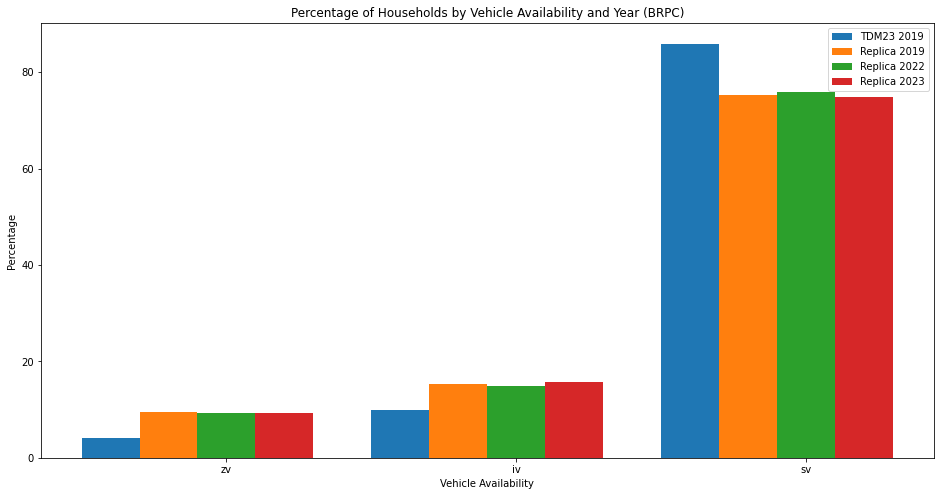

CCC
   va  tdm19  rep19  rep22  rep23  tdm19_perc  rep19_perc  rep22_perc  \
0  zv   3178   4359   4641   4754    3.276728    4.835918    4.955580   
1  iv  10192  12112  11472  11526   10.508625   13.437174   12.249605   
2  sv  83617  73667  77539  79381   86.214647   81.726908   82.794815   

   rep23_perc  
0    4.969632  
1   12.048797  
2   82.981570  


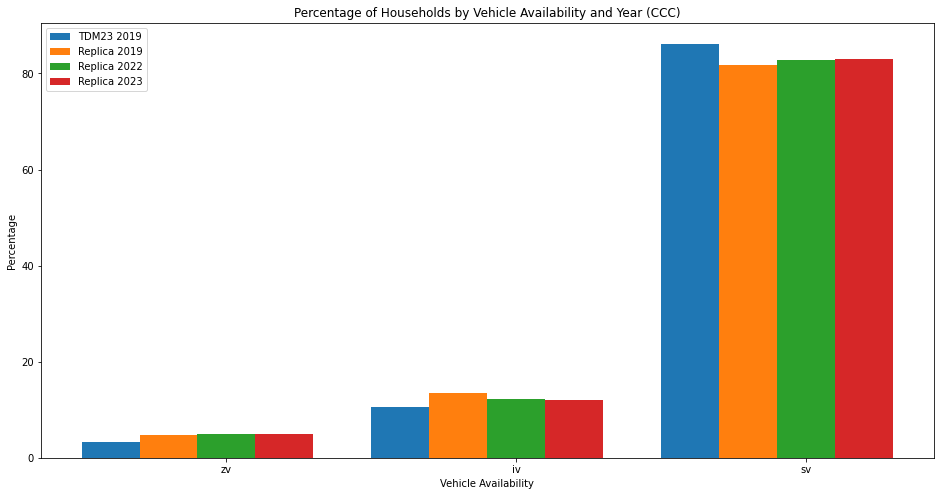

CMRPC
   va   tdm19   rep19   rep22   rep23  tdm19_perc  rep19_perc  rep22_perc  \
0  zv   12573   20323   20540   20504    5.871804    9.957081    9.625343   
1  iv   28656   34375   35293   33403   13.382837   16.841739   16.538813   
2  sv  172896  149408  157562  159579   80.745359   73.201180   73.835844   

   rep23_perc  
0    9.604377  
1   15.646459  
2   74.749164  


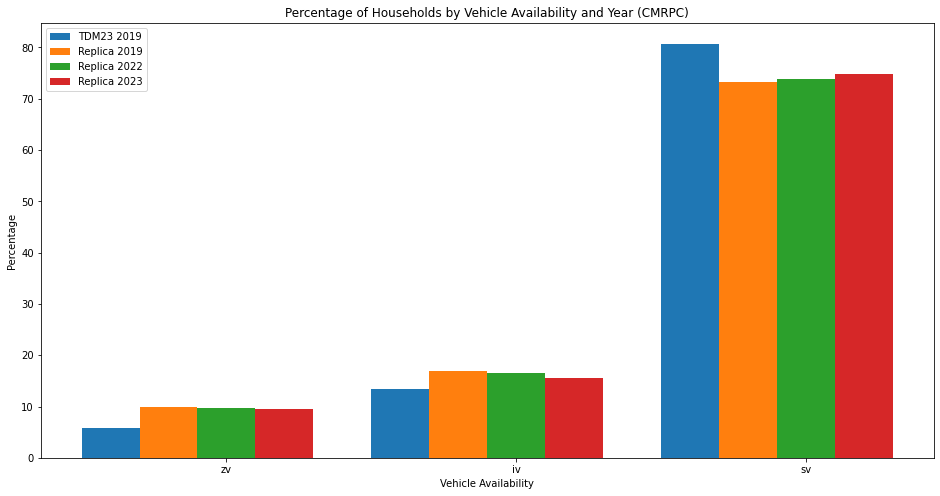

FRCOG
   va  tdm19  rep19  rep22  rep23  tdm19_perc  rep19_perc  rep22_perc  \
0  zv   1069   2139   2547   2212    3.603209    7.306076    8.670343   
1  iv   3052   3929   3838   3856   10.287178   13.420091   13.065087   
2  sv  25547  23209  22991  23388   86.109613   79.273833   78.264570   

   rep23_perc  
0    7.509506  
1   13.090712  
2   79.399783  


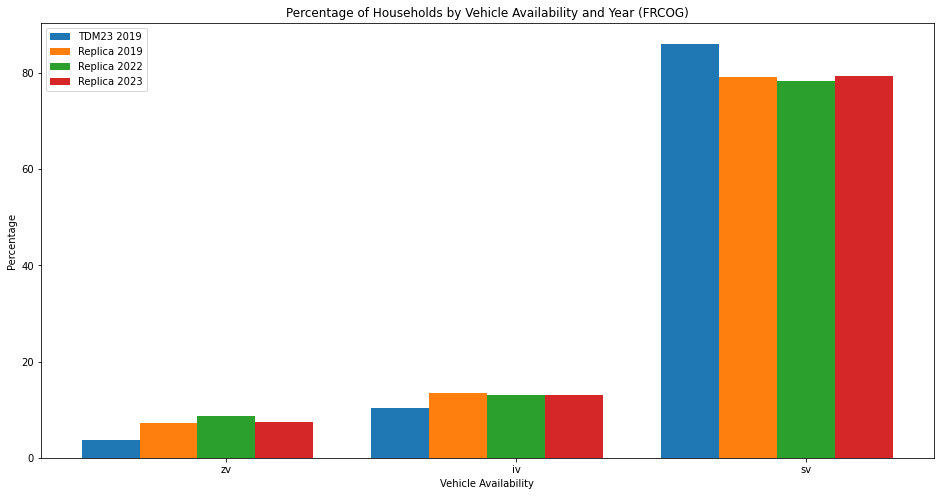

MRPC
   va  tdm19  rep19  rep22  rep23  tdm19_perc  rep19_perc  rep22_perc  \
0  zv   3580   7002   6602   6582    3.975304    8.068958    7.260131   
1  iv  10154  12340  13124  13871   11.275207   14.220358   14.432287   
2  sv  76322  67435  71209  71964   84.749489   77.710684   78.307582   

   rep23_perc  
0    7.122066  
1   15.009143  
2   77.868790  


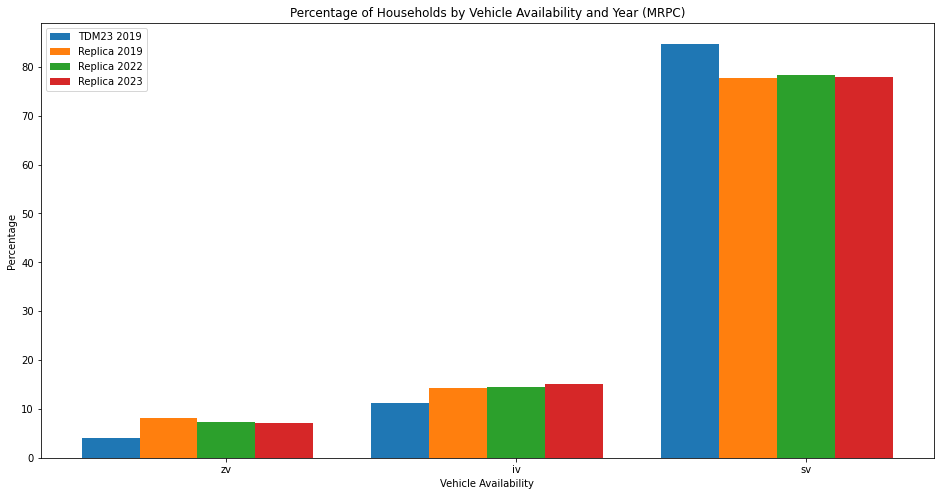

MVC
   va  tdm19  rep19  rep22  rep23  tdm19_perc  rep19_perc  rep22_perc  \
0  zv    246    206    271    334    2.987975    3.090773    4.231069   
1  iv    814    787    820    880    9.887040   11.807952   12.802498   
2  sv   7173   5672   5314   5384   87.124985   85.101275   82.966432   

   rep23_perc  
0    5.062140  
1   13.337375  
2   81.600485  


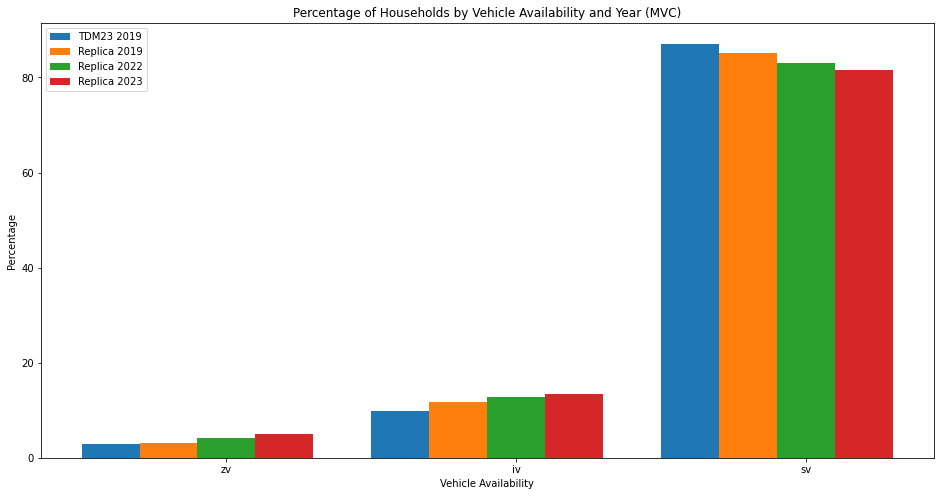

MVPC
   va  tdm19  rep19  rep22  rep23  tdm19_perc  rep19_perc  rep22_perc  \
0  zv   6897  11715  12225  11219    5.611058    9.783371    9.763207   
1  iv  17585  21524  22866  21277   14.306285   17.975013   18.261390   
2  sv  98436  86505  90124  93303   80.082657   72.241615   71.975402   

   rep23_perc  
0    8.918195  
1   16.913489  
2   74.168316  


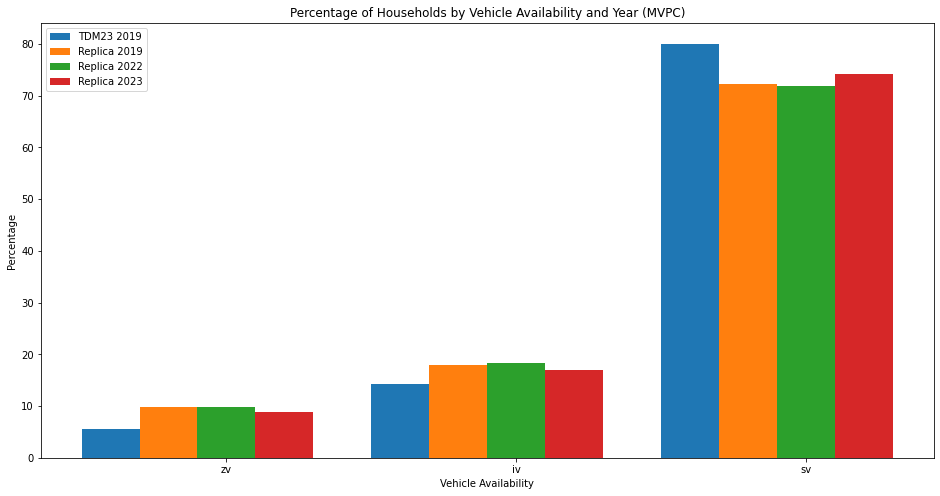

NMCOG
   va  tdm19  rep19  rep22  rep23  tdm19_perc  rep19_perc  rep22_perc  \
0  zv   5196   8936   8535   8251    5.166242    8.985420    8.291238   
1  iv  14213  15873  17115  17220   14.131602   15.960784   16.626190   
2  sv  81167  74641  77290  77052   80.702156   75.053796   75.082572   

   rep23_perc  
0    8.047950  
1   16.796231  
2   75.155819  


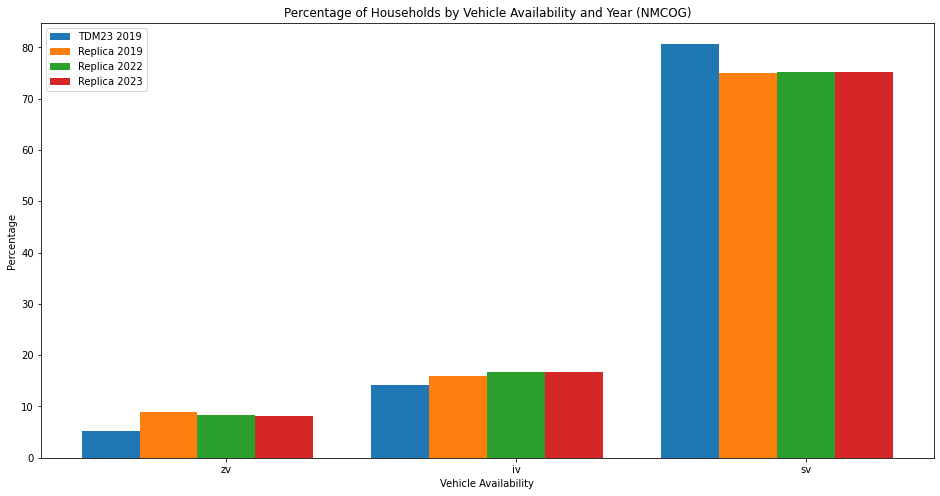

NPEDC
   va  tdm19  rep19  rep22  rep23  tdm19_perc  rep19_perc  rep22_perc  \
0  zv    126    230    290    201    2.629382    6.682162    8.233958   
1  iv    501    434    518    649   10.454925   12.608948   14.707553   
2  sv   4165   2778   2714   3426   86.915693   80.708890   77.058489   

   rep23_perc  
0    4.700655  
1   15.177736  
2   80.121609  


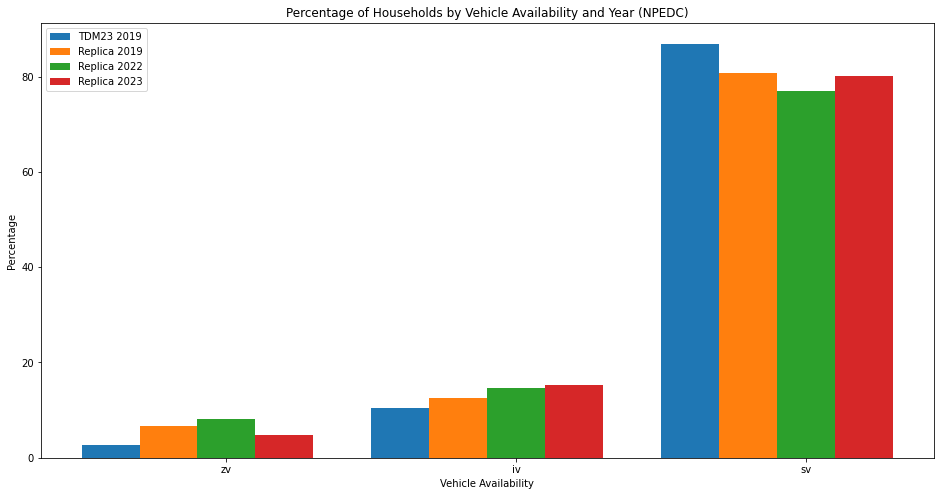

OCPC
   va   tdm19  rep19  rep22  rep23  tdm19_perc  rep19_perc  rep22_perc  \
0  zv    5131   8880   9874   9935    4.026019    7.252532    7.665435   
1  iv   15874  20025  19786  19797   12.455471   16.354949   15.360370   
2  sv  106441  93535  99152  99986   83.518510   76.392519   76.974195   

   rep23_perc  
0    7.658922  
1   15.261567  
2   77.079511  


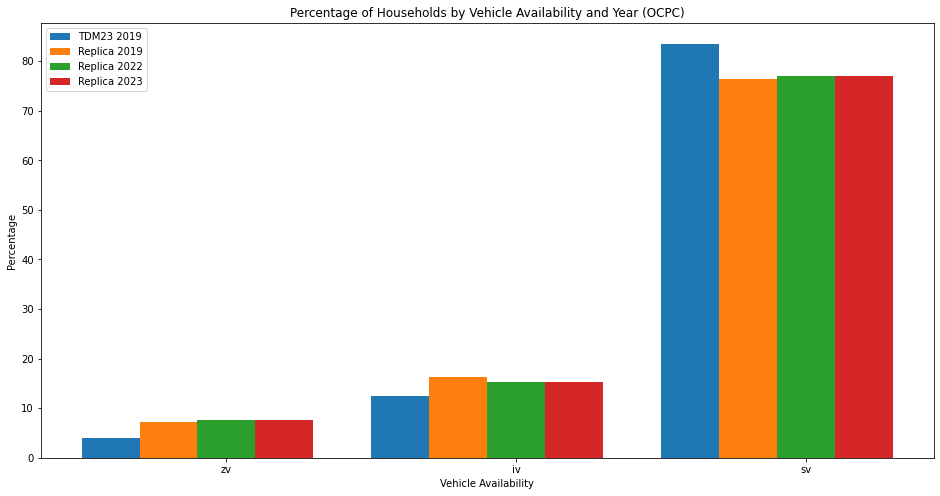

PVPC
   va   tdm19   rep19   rep22   rep23  tdm19_perc  rep19_perc  rep22_perc  \
0  zv   16538   27454   26413   25733    7.215406   12.234076   11.547474   
1  iv   28577   39027   38273   37369   12.467932   17.391246   16.732536   
2  sv  184089  157925  164048  165939   80.316661   70.374678   71.719989   

   rep23_perc  
0   11.235106  
1   16.315420  
2   72.449474  


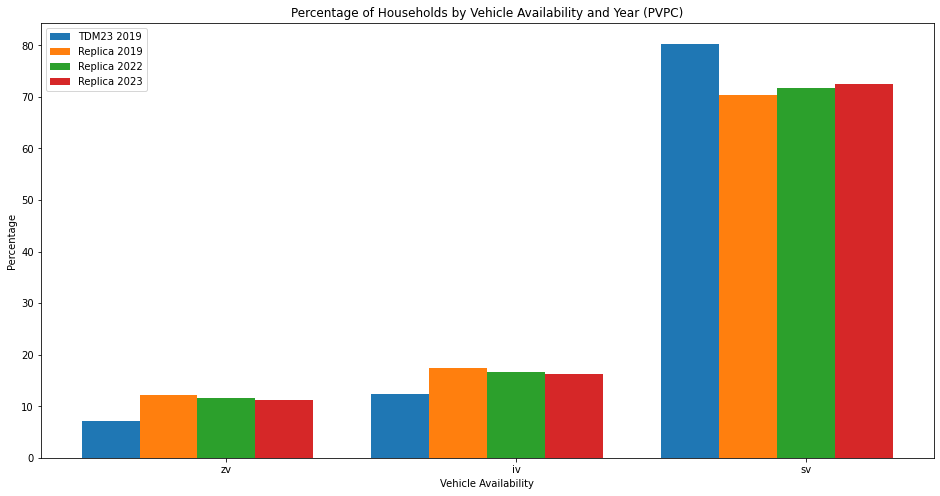

SRPEDD
   va   tdm19   rep19   rep22   rep23  tdm19_perc  rep19_perc  rep22_perc  \
0  zv   14627   23568   23429   23258    6.048014   10.200875    9.716819   
1  iv   30981   36850   38205   37623   12.810112   15.949688   15.844939   
2  sv  196240  170621  179484  181303   81.141874   73.849437   74.438242   

   rep23_perc  
0    9.603442  
1   15.534883  
2   74.861675  


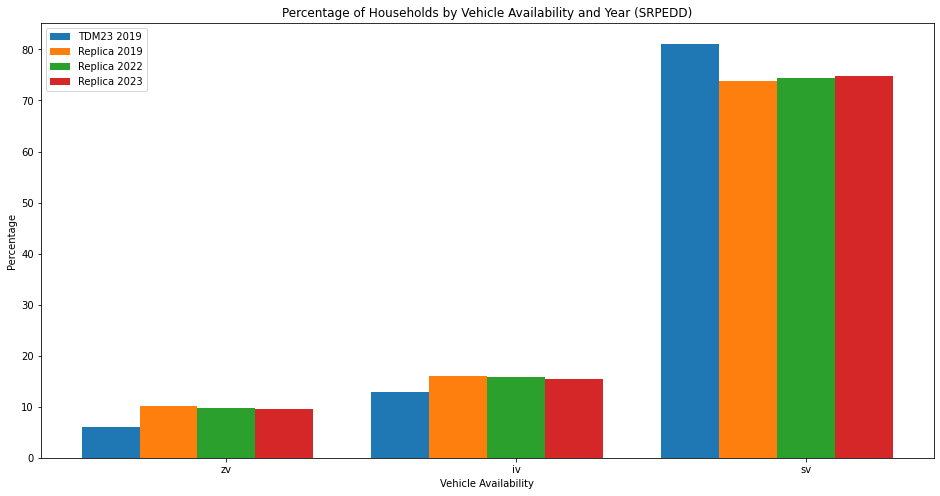

In [7]:
for mpo in mpos:
    print(mpo)
    va_comp(csv_1, csv_2, csv_3, csv_4, mpo)

# end